In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# $\mu_W$ learning rate selection

36


<AxesSubplot:>

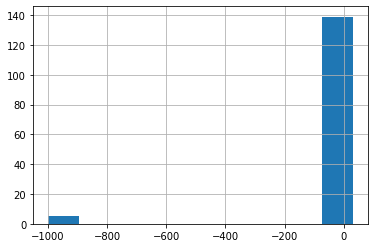

In [62]:
df_muW_results = pd.read_pickle(r"../Results/simulation_results_muWSelection.pkl")#.iloc[:12]

print(df_muW_results.shape[0]//4)
df_muW_results = df_muW_results.iloc[:4*(df_muW_results.shape[0]//4)]
df_muW_results['SINR'].hist()

In [64]:
df_muW_results.loc[df_muW_results['SINR'] == -999]

,trial,seed,Model,muW,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
15,3,4310556,CorInfoMax,0.1,-999.0,SVD did not converge,None,None,None,None,None,None,None
23,5,7184260,CorInfoMax,0.1,-999.0,SVD did not converge,None,None,None,None,None,None,None
83,20,28737040,CorInfoMax,0.1,-999.0,SVD did not converge,None,None,None,None,None,None,None
95,23,33047596,CorInfoMax,0.1,-999.0,SVD did not converge,None,None,None,None,None,None,None
123,30,43105560,CorInfoMax,0.1,-999.0,SVD did not converge,None,None,None,None,None,None,None


In [60]:
results = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

results

,muW,count,SINR
0,0.01,37,25.445443
1,0.03,36,27.290659
2,0.05,36,28.115563
3,0.10,31,28.341475


In [72]:
muW_list

array([0.01, 0.03, 0.05, 0.1 ])

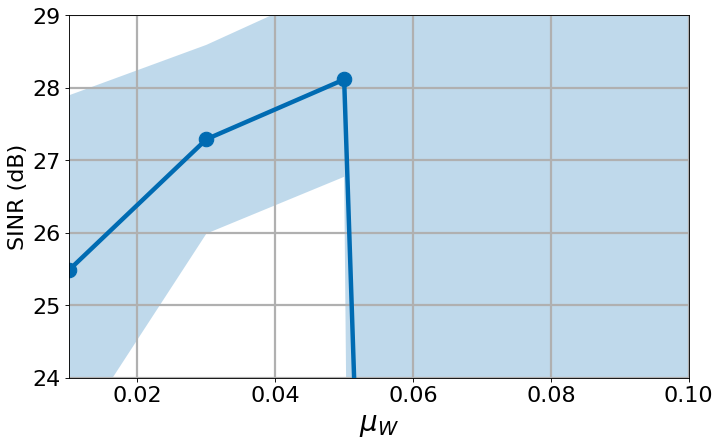

In [73]:
data= []
muW_list = [0.01, 0.03, 0.05, 0.10]
for muW__ in muW_list:
    data.append(df_muW_results.loc[df_muW_results['muW'] == muW__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

muW_list = np.array(SINRresults['muW'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muW_list,  mean_ + std_data, mean_ - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$\mu_W$",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.01, 0.1,24,29])

ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMax_NNAnti_muW_Ablation.pdf', format='pdf')

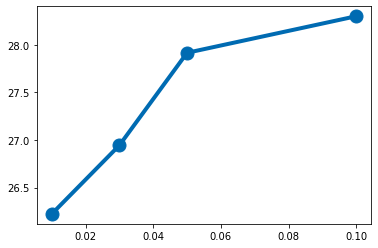

In [24]:
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')